In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


# **melihat data dan penggabungan**

In [ ]:
# melihat data dari kendaraan_train

In [ ]:
df_train = pd.read_csv('/content/sample_data/kendaraan_train.csv')
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
# melihat data dari kendaraan_test

In [ ]:
df_test = pd.read_csv('/content/sample_data/kendaraan_test.csv')
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [ ]:
# proses penggabungan dataset

In [ ]:
gab_df = pd.concat([df_test, df_train])
gab_df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,id
0,Wanita,49.0,1.0,8.0,0.0,1-2 Tahun,Pernah,46963.0,26.0,145.0,0,NaN
1,Pria,22.0,1.0,47.0,1.0,< 1 Tahun,Tidak,39624.0,152.0,241.0,0,NaN
2,Pria,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,110479.0,152.0,62.0,0,NaN
3,Pria,46.0,1.0,8.0,1.0,1-2 Tahun,Tidak,36266.0,124.0,34.0,0,NaN
4,Pria,35.0,1.0,23.0,0.0,1-2 Tahun,Pernah,26963.0,152.0,229.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0,285827.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0,285828.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0,285829.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0,285830.0


# **pre-processing data**

In [ ]:
gab_df.dtypes

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
id                   float64
dtype: object

In [ ]:
# melihat statistik dataset

In [ ]:
gab_df.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,id
count,319256.000000,319066.000000,319164.000000,319241.000000,318901.000000,319171.000000,319478.000000,333470.000000,285831.000000
mean,38.840028,0.997859,26.394380,0.458603,30550.097899,112.045299,154.310350,0.122551,142916.000000
std,15.526398,0.046217,13.246852,0.498284,17192.548724,54.196470,83.686932,0.327921,82512.446734
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,1.000000
25%,25.000000,1.000000,15.000000,0.000000,24397.000000,29.000000,82.000000,0.000000,71458.500000
50%,36.000000,1.000000,28.000000,0.000000,31660.000000,133.000000,154.000000,0.000000,142916.000000
75%,49.000000,1.000000,35.000000,1.000000,39392.000000,152.000000,227.000000,0.000000,214373.500000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,285831.000000


In [ ]:
# mencari data yang missing value / null

In [ ]:
gab_df.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
id                   47639
dtype: int64

In [ ]:
# menghapus barisan yang memiliki missing value / null

In [ ]:
gab_df = gab_df.dropna()
gab_df.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
id                   0
dtype: int64

In [ ]:
# mengubah fitur yang tadi nya string menjadi numerik

gab_df['Umur_Kendaraan'].replace({
    '< 1 Tahun': 0, '1-2 Tahun': 1, '> 2 Tahun': 2}, inplace=True)
gab_df['Jenis_Kelamin'].replace({
    'Wanita': 0, 'Pria':1}, inplace=True)
gab_df['Kendaraan_Rusak'].replace({
    'Tidak':0, 'Pernah':1}, inplace=True)
gab_df

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,id
0,0,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0,0,1.0
1,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0,2.0
3,0,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0,0,4.0
5,1,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0,0,6.0
8,0,20.0,1.0,8.0,1.0,0,0,30786.0,160.0,31.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,0,23.0,1.0,4.0,1.0,0,0,25988.0,152.0,217.0,0,285827.0
285827,0,21.0,1.0,46.0,1.0,0,0,44686.0,152.0,50.0,0,285828.0
285828,0,23.0,1.0,50.0,1.0,0,0,49751.0,152.0,226.0,0,285829.0
285829,1,68.0,1.0,7.0,1.0,1,0,30503.0,124.0,270.0,0,285830.0


# **Eksplorasi data**

cek penyebaran dataset

In [ ]:
# cek penyebaran isi dataset pada atribut yang bukan hanya bilangan 0 dan 1

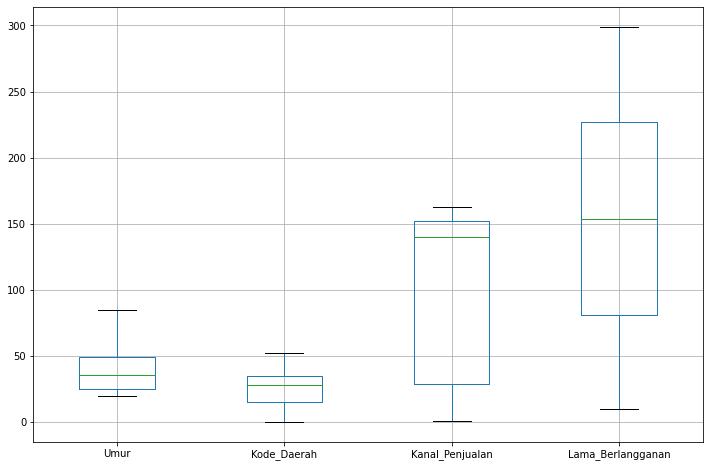

In [ ]:
gab_df.boxplot(column = ['Umur', 'Kode_Daerah', 'Kanal_Penjualan', 'Lama_Berlangganan'], layout=None, figsize=(12,8))
plt.show()

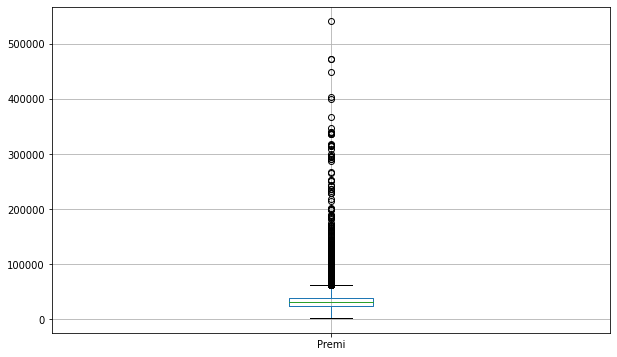

In [ ]:
boxplot = gab_df.boxplot(column = ['Premi'], layout=None, figsize=(10,6))

Cek Korelasi data

In [ ]:
# cek korelasi pada dataset yang sama seperti dataset yang di cek sebelum nya

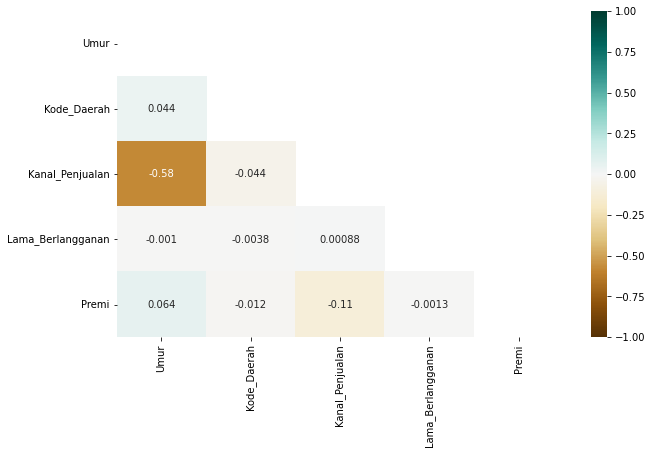

In [ ]:
gab_df_corr = gab_df [['Umur', 'Kode_Daerah', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Premi']].corr()
mask = np.triu(np.ones_like(gab_df_corr, dtype=np.bool))
plt.figure(figsize=(10, 6))
sns.heatmap(gab_df_corr, annot=True, mask=mask, vmin=-1, vmax=1, cmap='BrBG')
plt.show()

Splitting data

In [ ]:
# melakukan data splitting yang memiliki nilai korelasi terbesar dan nilai korelasi terkecil

In [ ]:
x = 'Umur'
y = 'Premi'
z = 'Kanal_Penjualan'
dfs = gab_df.loc[:,[x,y,z]]
dfs

,Umur,Premi,Kanal_Penjualan
0,30.0,28029.0,152.0
1,48.0,25800.0,29.0
3,58.0,2630.0,124.0
5,21.0,22735.0,152.0
8,20.0,30786.0,160.0
...,...,...,...
285826,23.0,25988.0,152.0
285827,21.0,44686.0,152.0
285828,23.0,49751.0,152.0
285829,68.0,30503.0,124.0


Scalling data

In [ ]:
# proses scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
data = normalize.fit_transform(dfs)
col= [x,y,z]
dfs = pd.DataFrame(data, columns=col)
dfs

,Umur,Premi,Kanal_Penjualan
0,0.153846,0.047251,0.932099
1,0.430769,0.043104,0.172840
2,0.584615,0.000000,0.759259
3,0.015385,0.037402,0.932099
4,0.000000,0.052380,0.981481
...,...,...,...
171063,0.046154,0.043454,0.932099
171064,0.015385,0.078239,0.932099
171065,0.046154,0.087661,0.932099
171066,0.738462,0.051853,0.759259


# **Pemodelan (KMeans)**

In [ ]:
def euclidean(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

class Kmeans:
  def __init__(self, kmeans_cluster=3, kmeans = 2, max_iterasi = 200):
    self.kmeans = kmeans
    self.max_iterasi = max_iterasi
    self.centroid = []
    self.cluster = [[] for i in range(self.kmeans)]

  # mendefinisikan fit centroid
  def fit(self, data):
    for i in range(self.kmeans):
      self.centroid[i] = data[i]

  # menghitung jarak terdekat centroid
  def memilih_centroid(self, row):
    DistCent = [euclidean(row,centroid) for centroid in self.centroid]
    return np.argmin(DistCent)

  # membuat centroid
  def create_centroid(self):
    centroid = np.zeros((self.kmeans, self.column))
    for indexCluster, cluster in enumerate(self.cluster):
      newCent = np.mean(self.predict[cluster], axis=0)
      centroid[indexCluster] = newCent
    return centroid

  def create_label(self):
    label = np.empty(self.row)
    for indexCluster, cluster in enumerate(self.cluster):
      for row in cluster:
        label[row] = indexCluster
    return label

  def prediksi(self, predict):
    self.predict = predict
    self.row, self.column = predict.shape

    # menentukkan centroid secara random
    index_centroid = np.random.choice(self.row, self.kmeans, replace=False)
    for index in index_centroid:
      self.centroid.append(self.predict[index])

    for i in range(self.max_iterasi):
      cluster = [[] for i in range(self.kmeans)]
      for idx, row in enumerate(self.predict):
        indexcentroidterdekat = self.memilih_centroid(row)
        cluster[indexcentroidterdekat].append(idx)

      self.cluster = cluster

      # update centroid
      oldcentroid = self.centroid
      self.centroid = self.create_centroid()

      change = False
      for i, oldcentroid in enumerate(oldcentroid):
        distance = euclidean(oldcentroid, self.centroid[i])
        if (distance != 0):
          change = True
        if (change == False):
          break

      label = self.create_label()
      return label

# **Evaluasi (Elbow Method)**

In [ ]:
k = dfs.to_numpy()
k.shape

(171068, 3)

In [ ]:
range_kmeans = range(1,10)
sse = []
for i in range_kmeans:
  kmeans = KMeans(i)
  kmeans.fit(k)
  sse.append(kmeans.inertia_)
print("Hasil Evaluasi: ")
sse

Hasil Evaluasi: 


[29022.927127917927,
 8780.019917218928,
 4070.70319316431,
 2902.081705614022,
 2003.1766062625468,
 1697.9791617314397,
 1441.6809736103805,
 1243.6143196479984,
 1095.1588448614848]

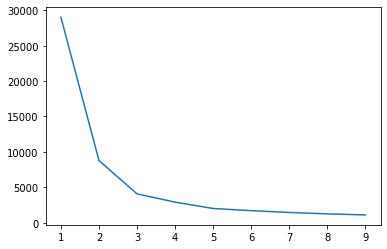

In [ ]:
plt.figure()
plt.plot(range_kmeans, sse)

# **Eksperimen 1**

Eksperimen umur dan premi

In [ ]:
eksperimen_UP = gab_df.loc[:, ('Umur', 'Premi')]
eksperimen_UP

,Umur,Premi
0,30.0,28029.0
1,48.0,25800.0
3,58.0,2630.0
5,21.0,22735.0
8,20.0,30786.0
...,...,...
285826,23.0,25988.0
285827,21.0,44686.0
285828,23.0,49751.0
285829,68.0,30503.0


Scatter plot

In [ ]:
# proses scatter plot sebelum data di clustering

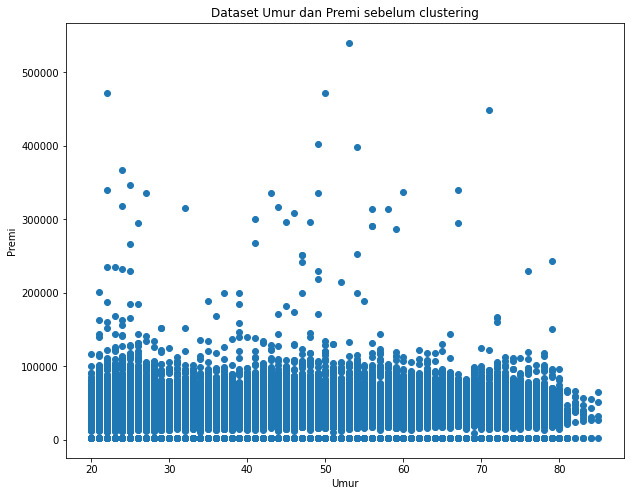

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(eksperimen_UP.iloc[:,0], eksperimen_UP.iloc[:,1])
ax.set_xlabel(eksperimen_UP.columns[0])
ax.set_ylabel(eksperimen_UP.columns[1])
plt.title("Dataset Umur dan Premi sebelum clustering")
plt.show()

In [ ]:
# proses mencari nilai K

In [ ]:
kUP = eksperimen_UP.to_numpy()
kUP.shape

(171068, 2)

Elbow Method eksperimen Umur dan Premi

In [ ]:
range_kmeans = range(1,10)
sse_eksperimenUP = []
for i in range_kmeans:
  kmeans_eksperimenUP = KMeans(i)
  kmeans_eksperimenUP.fit(kUP)
  sse_eksperimenUP.append(kmeans_eksperimenUP.inertia_)
print("Hasil Evaluasi: ")
sse_eksperimenUP

Hasil Evaluasi: 


[49965650693387.52,
 22294478408243.766,
 11076788152329.455,
 7283475537227.207,
 4696340803125.95,
 3125571810911.821,
 2276434267988.8716,
 1723182128620.967,
 1378983248084.7866]

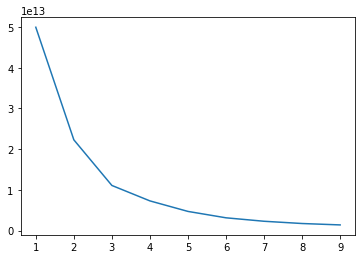

In [ ]:
plt.figure()
plt.plot(range_kmeans, sse_eksperimenUP)

Clustering data Umur dan Premi

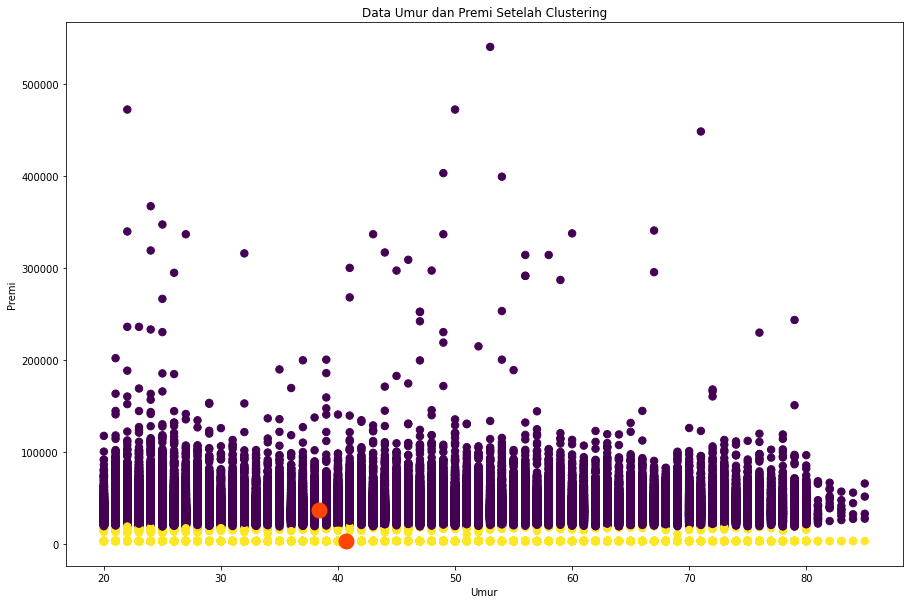

In [ ]:
eksperimenUP = Kmeans(kmeans=2, max_iterasi=10)
y = eksperimenUP.prediksi(kUP)

plt.figure(figsize=(15,10))
plt.scatter(kUP[:, 0], kUP[:, 1], c=y, s=55)

centroid = eksperimenUP.centroid
plt.scatter(centroid[:, 0], centroid[:, 1], c= 'orangered', marker = 'o', linewidths = 10)
plt.xlabel(eksperimen_UP.columns[0])
plt.ylabel(eksperimen_UP.columns[1])
plt.title("Data Umur dan Premi Setelah Clustering")
plt.show()

Silhoutte Score

In [ ]:
silhoutteUP = silhouette_score(kUP, y)
print("Hasil Silhoutte Score dari data: " +str(silhoutteUP))

Hasil Silhoutte Score dari data: 0.6860471793720136


# **Eksperimen 2**

Eksperimen Umur dan Kanal Penjualan

In [ ]:
eksperimen_UK = gab_df.loc[:, ('Umur', 'Kanal_Penjualan')]
eksperimen_UK

,Umur,Kanal_Penjualan
0,30.0,152.0
1,48.0,29.0
3,58.0,124.0
5,21.0,152.0
8,20.0,160.0
...,...,...
285826,23.0,152.0
285827,21.0,152.0
285828,23.0,152.0
285829,68.0,124.0


Scatter plot

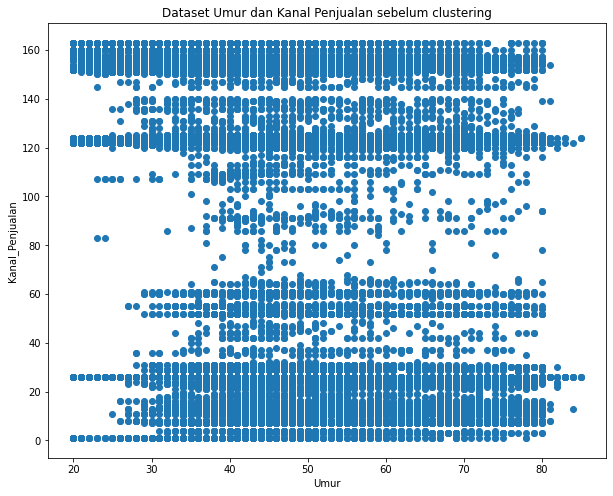

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(eksperimen_UK.iloc[:,0], eksperimen_UK.iloc[:,1])
ax.set_xlabel(eksperimen_UK.columns[0])
ax.set_ylabel(eksperimen_UK.columns[1])
plt.title("Dataset Umur dan Kanal Penjualan sebelum clustering")
plt.show()

In [ ]:
# proses mencari nilai K

In [ ]:
kUK = eksperimen_UK.to_numpy()
kUK.shape

(171068, 2)

Elbow method eksperimen Umur dan Kanal Penjualan

In [ ]:
range_kmeans = range(1,10)
sse_eksperimenUK = []
for i in range_kmeans:
  kmeans_eksperimenUK = KMeans(i)
  kmeans_eksperimenUK.fit(kUK)
  sse_eksperimenUK.append(kmeans_eksperimenUK.inertia_)
print("Hasil Evaluasi: ")
sse_eksperimenUK

Hasil Evaluasi: 


[542071951.4787452,
 60604582.50524657,
 25166333.23296987,
 20107164.133996524,
 15171428.820357932,
 11204424.288940068,
 9875300.9174904,
 8476689.86970783,
 7247378.718857989]

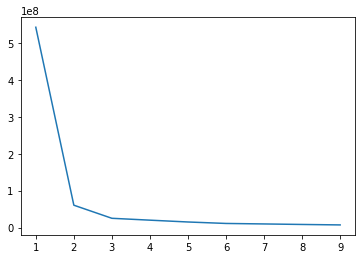

In [ ]:
plt.figure()
plt.plot(range_kmeans, sse_eksperimenUK)

Clustering Umur dan Kanal Penjualan

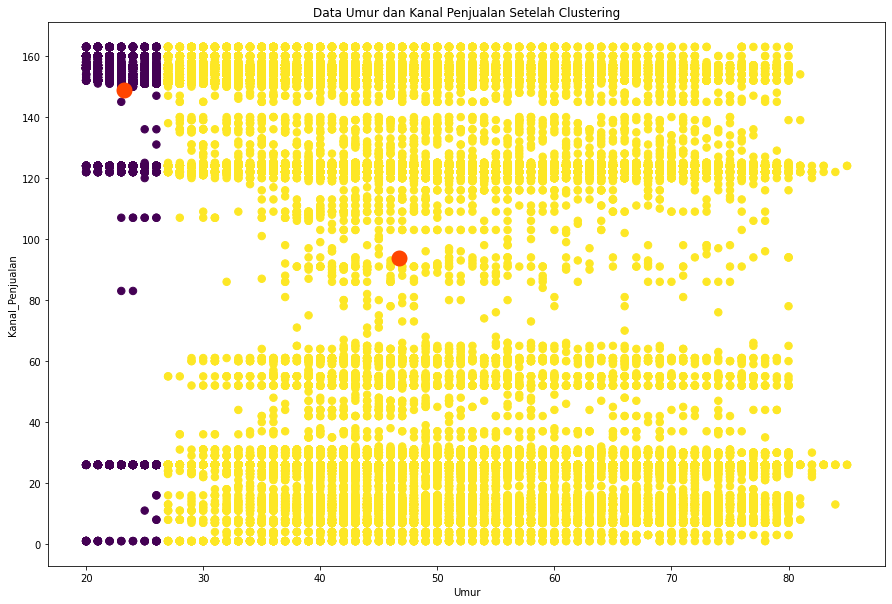

In [ ]:
eksperimenUK = Kmeans(kmeans=2, max_iterasi=10)
z = eksperimenUK.prediksi(kUK)

plt.figure(figsize=(15,10))
plt.scatter(kUK[:, 0], kUK[:, 1], c=z, s=55)

centroid = eksperimenUK.centroid
plt.scatter(centroid[:, 0], centroid[:, 1], c= 'orangered', marker = 'o', linewidths = 10)
plt.xlabel(eksperimen_UK.columns[0])
plt.ylabel(eksperimen_UK.columns[1])
plt.title("Data Umur dan Kanal Penjualan Setelah Clustering")
plt.show()

Silhoutte score

In [ ]:
silhoutteUK = silhouette_score(kUK, z)
print("Hasil Silhoutte Score dari data: " +str(silhoutteUK))

Hasil Silhoutte Score dari data: 0.2030067279376209
